# Finance: Measuring Investment Risk

**Variability** -- plays an important role in the world of finance. It is the **best measure of risk** that we have.

A volatile stock is much more likely to deviate from its historical returns and surprise investors negatively.

Commonly used statistical measures, such as **variance** and **standard deviation**, can help a great deal when trying to quantify risk associated with the dispersion in the likely outcome. Such dispersion is measured by a security's variance and standard deviation.

>**Sample Variance** - measures the dispersion of a set of data points around the mean

 >s^2 =  sum[(x - mean)^2] / (n-1)

 >**Standard Deviation**

 > s = sqrt(s^2)

## Risk of a Security

In [1]:
# Update pandas datareader
!pip install --upgrade pandas-datareader

In [2]:
# Import the relevant libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [3]:
# Retrieve data for P&G and BEI from Yahoo Finance
tickers = ['PG', 'BEI.DE']

secur_data = pd.DataFrame()

for t in tickers:
  secur_data[t] = web.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [4]:
# Review the last 5 rows of data from the securitys dataframe
secur_data.tail()

,PG,BEI.DE
Date,,
2022-02-14,156.740005,87.480003
2022-02-15,156.820007,88.339996
2022-02-16,158.009995,88.239998
2022-02-17,159.820007,90.320000
2022-02-18,159.899994,91.120003


In [5]:
# Evalauate the log rate of return for the security dataframe
secur_returns = np.log(secur_data / secur_data.shift(1))
secur_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006545
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002203,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2022-02-14,0.002875,-0.005927
2022-02-15,0.000510,0.009783
2022-02-16,0.007560,-0.001133


###P&G (PG)

In [25]:
PG_returns_daily = secur_returns['PG'].mean()
PG_returns_annual = secur_returns['PG'].mean() * 250    # 250 trading days in a year
PG_returns_dstd = secur_returns['PG'].std()
PG_returns_astd = secur_returns['PG'].std() * 250 ** 0.5

print('P&G Mean Daily Rate of Returns = ' + str(round(PG_returns_daily, 4)*100) +' %')
print('P&G Mean Annual Rate of Returns = ' + str(round(PG_returns_annual,5)*100) + ' %')
print('P&G Standard Deviation of Daily Rate of Return = ' + str(round(PG_returns_dstd,4)*100) + ' %')
print('P&G Standard Deviation of Annual Rate of Return = ' + str(round(PG_returns_astd,4)*100) + ' %')

P&G Mean Daily Rate of Returns = 0.04 %
P&G Mean Annual Rate of Returns = 8.872 %
P&G Standard Deviation of Daily Rate of Return = 1.17 %
P&G Standard Deviation of Annual Rate of Return = 18.5 %


### Beiersdorf (BEI.DE)

In [26]:
BEI_returns_daily = secur_returns['BEI.DE'].mean()
BEI_returns_annual = secur_returns['BEI.DE'].mean() * 250    # 250 trading days in a year
BEI_returns_dstd = secur_returns['BEI.DE'].std()
BEI_returns_astd = secur_returns['BEI.DE'].std() * 250 ** 0.5

print('Beiersdorf Mean Daily Rate of Returns = ' + str(round(BEI_returns_daily, 4)*100) +' %')
print('Beiersdorf Mean Annual Rate of Returns = ' + str(round(BEI_returns_annual,5)*100) + ' %')
print('Beiersdorf Standard Deviation of Daily Rate of Return = ' + str(round(BEI_returns_dstd,4)*100) + ' %')
print('Beiersdorf Standard Deviation of Annual Rate of Return = ' + str(round(BEI_returns_astd,4)*100) + ' %')

Beiersdorf Mean Daily Rate of Returns = 0.02 %
Beiersdorf Mean Annual Rate of Returns = 4.72 %
Beiersdorf Standard Deviation of Daily Rate of Return = 1.37 %
Beiersdorf Standard Deviation of Annual Rate of Return = 21.63 %


### Compare P&G to Beiersdorf

In [29]:
# Compare the annual means
print('P&G Mean Annual Rate of Returns = ' + str(round(PG_returns_annual,5)*100) + ' %')
print('Beiersdorf Mean Annual Rate of Returns = ' + str(round(BEI_returns_annual,5)*100) + ' %')

P&G Mean Annual Rate of Returns = 8.872 %
Beiersdorf Mean Annual Rate of Returns = 4.72 %


##Covariance and Correlation between Securities

It is reasonable to expect the prices of shares in a stock exchange are influenced by common factors. Favorable macroeconomic conditions facilitate the business of all companies. During a recession, consumer spending decreases and businesses suffer.

Companies' shares are influenced by the state of the economy. However, different industries are influenced in different ways (i.e. some industries do better than others in times of crisis).

**Covariance** -- measure of the joint variability to two random variables

* (+) = two variables move in the same direction

* (-) = two variables move in the opposite direction 

* 0 = two variables are independent from each other

**Correlation** -- measure of the extent to which two variables are linearly related (change together at a constant rate)
 * *Perfect Correlation* = 1  
   * i.e. square footage and rent cost
   * entire variability of the second variable is explained by the first variable
 * *Perfect Negative Correlation* = -1 
   * i.e. ice cream shop and umbrella business
 * *Imperfect Negative Correlation* = between -1 and 0
 * *Neutral Correlation* = 0 
   * i.e. price coffee in Brazil and house prices in London
   * two variables are independent from each other


In [33]:
# Determine the variance of P&G's daily and annual rate of returns
PG_var = secur_returns['PG'].var()
PG_avar = secur_returns['PG'].var() * 250   # 250 trading days in a year
PG_var, PG_avar

(0.00013693943166990133, 0.03423485791747533)

In [36]:
# Determine the variance of BEI's daily and annual rate of returns
BEI_var = secur_returns['BEI.DE'].var()
BEI_avar = secur_returns['BEI.DE'].var() * 250  # 250 trading days in a year
BEI_var, BEI_avar

(0.0001871465596325566, 0.046786639908139145)

Alternatively, can determine the covariance of the `secur_returns` matrix to determine the daily and annual rate of returns for P&G and Beiersdorf.

In [39]:
# Obtain daily covariance matrices for the rates of returns
cov_matrix = secur_returns.cov()
cov_matrix

,PG,BEI.DE
PG,0.000137,0.000043
BEI.DE,0.000043,0.000187


In [40]:
# Obtain annual covariance matrices for the rates of returns
cov_amatrix = secur_returns.cov() * 250   # 250 trading days in a year
cov_amatrix

,PG,BEI.DE
PG,0.034235,0.010734
BEI.DE,0.010734,0.046787


In [42]:
# Obtain the daily correlations of the rates of return for P&G and Beiersdorf
corr_matrix = secur_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.267836
BEI.DE,0.267836,1.000000


❗❗❗**REMEMBER**❗❗❗

The correlation of rates of return reflect the dependence between prices at different times and focuses on the returns of the portfolio.

Whereas, the correlation of prices focuses on stock price levels.

## Portfolio Variance

If a portfolio contains **n** stocks, its risk will be a function of the variances of the **n** stocks and of the correlation between them.

> Variance (2 stocks) = (a + b)^2 = a^2 + 2ab + b^2

>>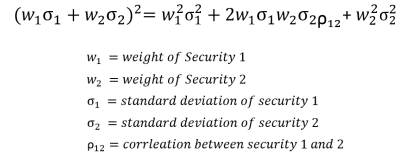


##Portfolio Risk (P&G and Beiersdorf)


**Types of Risk:**
1. *Systematic Risk* (cannot be eliminated)
 * the uncertainty that is characteristic of the entire market.
 * made of the day to day changes in stock priced and is caused by events that affect all companies.
 * i.e. recessions, low consumer spending, wars, forces of nature, etc.

2. *Unsystematic/Idiosyncratic/Undiversifiable Risk* 
 * company specific, even industry-specific, risks that can be smoothed out through diversification


###Equal Weighting Scheme

In [45]:
weights = np.array([0.5, 0.5])  
weights

array([0.5, 0.5])

###Portfolio Variance

[w * Cov]^2 = w.transpose() * Cov * w = single number

In [46]:
portf_var = np.dot(weights.T, np.dot(secur_returns.cov() * 250, weights))
portf_var

0.025622537062057367

###Portfolio Volatility

In [57]:
portf_vol = pow((np.dot(weights.T, np.dot(secur_returns.cov() * 250, weights))),0.5)
print(str(round(portf_vol, 3) * 100) + ' %')

16.0 %


###Diversifiable Risk

Diversifiable Risk = Portfolio Variance - Weighted Annual Variances

In [88]:
div_risk = portf_var - (pow(weights[0],2) * PG_avar) - (pow(weights[1],2) * BEI_avar)
print('Diversifiable Risk of the Portfolio = ' + str(round(div_risk,4) * 100) + ' %')

Diversifiable Risk of the Portfolio = 0.54 %


###Non-Diversifiable Risk

Non-Diversifiable Risk = Portfolio Variance - Diversifiable Risk 

or alternatively...

Non-Diversifiable Risk = SUM(Weighted Annual Variances)

In [84]:
non_div_risk = portf_var - div_risk
print('Non-Diversifiable Risk of the Portfolio = ' + str(round(non_div_risk,4) * 100) + ' %')

Non-Diversifiable Risk of the Portfolio = 2.03 %


In [89]:
non_div_risk2 = (pow(weights[0],2) * PG_avar) + (pow(weights[1],2) * BEI_avar)
print('Non-Diversifiable Risk of the Portfolio = ' + str(round(non_div_risk2,4) * 100) + ' %')

Non-Diversifiable Risk of the Portfolio = 2.03 %


In [91]:
# Check that both solutions from the different equations are equal
int(non_div_risk) == int(non_div_risk2)   # had to use int as the floats were rounded at the ends

True

In [93]:
non_div_risk, non_div_risk2

(0.020255374456403616, 0.02025537445640362)